In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score


In [3]:
df = pd.read_csv('BreastCancer.csv').set_index('Code')

In [4]:
df.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [5]:
X = df.drop('Class',axis=1)

In [6]:
scaler = StandardScaler().set_output(transform='pandas')
X_scl = scaler.fit_transform(X)

prcomp = PCA().set_output(transform='pandas')

scores = prcomp.fit_transform(X_scl)
scores

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Code,,,,,,,,,
61634,-0.661561,-0.168216,0.583962,-0.439347,-0.230526,0.130653,-0.097528,0.541727,0.328081
63375,2.178759,-0.693348,0.432389,1.192376,-1.074153,-0.442691,-0.702441,-1.787781,-0.244667
76389,1.404956,-1.364750,1.761714,0.878367,0.013219,-0.517801,0.835375,0.408381,-0.565653
95719,6.073098,1.994961,-1.081435,0.237234,-0.141189,0.019790,-0.355352,0.444035,-0.062628
128059,-1.237518,-0.370332,-0.823064,0.473932,-0.127604,-1.151372,0.508269,-0.344131,0.029906
...,...,...,...,...,...,...,...,...,...
1369821,6.473443,1.285709,0.048059,0.936819,-1.446932,0.152226,0.731058,0.235807,-0.042668
1371026,4.097345,-0.215083,-1.078721,0.912918,0.027151,0.599090,-0.276698,1.705969,0.099999
1371920,-1.351669,-0.095164,0.536224,-0.120275,-0.359013,0.101649,0.178219,-0.452815,0.002252


In [7]:
scores.var()

pca0    5.899333
pca1    0.777475
pca2    0.539624
pca3    0.462914
pca4    0.380272
pca5    0.305723
pca6    0.296021
pca7    0.262712
pca8    0.088819
dtype: float64

In [8]:
total_var= scores.var().sum()
total_var

9.012893982808022

In [9]:
prcomp.explained_variance_ratio_*100

array([65.45437483,  8.62625123,  5.98724547,  5.13612665,  4.21920122,
        3.39206535,  3.28441735,  2.91485025,  0.98546764])

<Axes: xlabel='Clump', ylabel='UniCell_Size'>

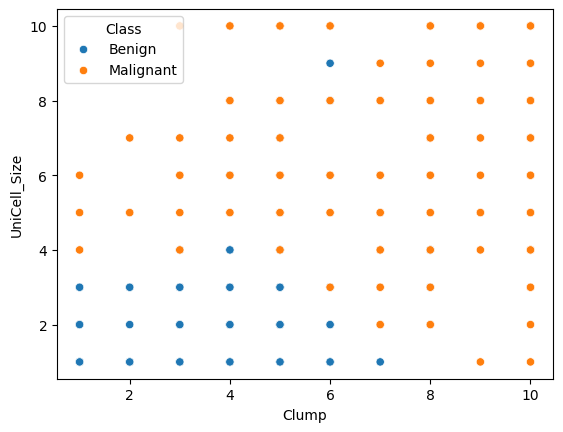

In [10]:
sns.scatterplot(x='Clump',y='UniCell_Size',hue='Class',data=df)

<Axes: xlabel='UniCell_Size', ylabel='SEpith'>

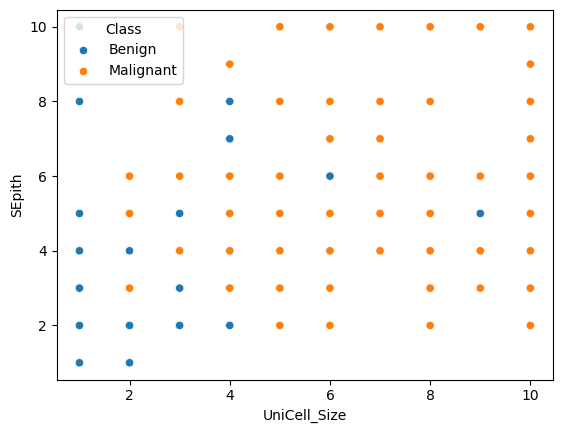

In [11]:
sns.scatterplot(x='UniCell_Size' ,y='SEpith',hue='Class',data=df)

<Axes: xlabel='pca0', ylabel='pca1'>

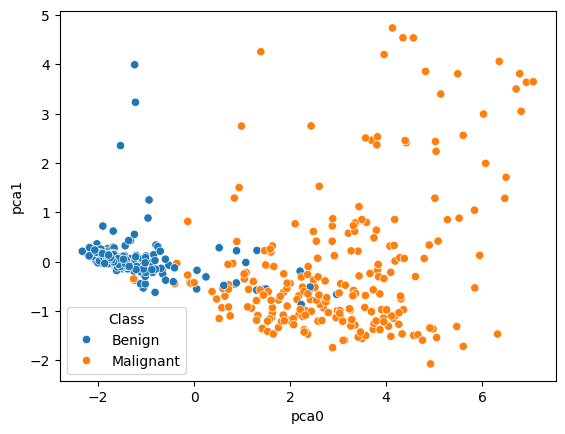

In [12]:
df_pca = scores.copy()
df_pca['Class']= df['Class']
sns.scatterplot(x='pca0',y='pca1',data=df_pca,hue='Class')

Usage with **Supervised Learning**

In [13]:
#PCA+Logistic

In [14]:
X = df.drop('Class',axis=1)
y= df['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)
lr= LogisticRegression()
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:6], y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:6])
print(accuracy_score(y_test, y_pred))

0.9761904761904762


In [16]:
lr= LogisticRegression()
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:5], y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:5])
print(accuracy_score(y_test, y_pred))

0.9761904761904762


In [17]:
lr= LogisticRegression()
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:3], y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:3])
print(accuracy_score(y_test, y_pred))

0.9619047619047619


In [18]:
lr= LogisticRegression()
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:2], y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:2])
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [19]:
lr= LogisticRegression()
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:1], y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:1])
print(accuracy_score(y_test, y_pred))

0.9714285714285714


In [20]:
#without iloc

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)
lr= LogisticRegression(random_state=24)
prcomp= PCA(n_components=6).set_output(transform='pandas')
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca, y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca)
print(accuracy_score(y_test, y_pred))

0.9761904761904762


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)
lr= LogisticRegression(random_state=24)
prcomp= PCA(n_components=5).set_output(transform='pandas')
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca, y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca)
print(accuracy_score(y_test, y_pred))

0.9761904761904762


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)
lr= LogisticRegression(random_state=24)
prcomp= PCA(n_components=4).set_output(transform='pandas')
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca, y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca)
print(accuracy_score(y_test, y_pred))

0.9714285714285714


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)
lr= LogisticRegression(random_state=24)
prcomp= PCA(n_components=2).set_output(transform='pandas')
pipe_pca= Pipeline([('SCL',scaler), ('PCA', prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca, y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


### Grid Search CV

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [33]:
scaler,prcomp,lr = StandardScaler(),PCA(),LogisticRegression(random_state=24)
kfold = StratifiedKFold(n_splits=5)
pipe = Pipeline([('SCL',scaler),('PCA',prcomp),('LR',lr)])
params = {'PCA__n_components':[2,3,4,5,6]}

gcv = GridSearchCV(pipe,param_grid=params,cv=kfold,scoring='roc_auc')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('SCL', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('LR',
                                        LogisticRegression(random_state=24))]),
             param_grid={'PCA__n_components': [2, 3, 4, 5, 6]},
             scoring='roc_auc')

In [34]:
gcv.best_params_

{'PCA__n_components': 6}

gcv.best_score_

### Linear Discriminant Transformation

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
lda = LinearDiscriminantAnalysis()
pipe_lda = Pipeline([('LDA',lda),('LR',lr)])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)

In [42]:
pipe_lda.fit(X_train,y_train)

Pipeline(steps=[('LDA', LinearDiscriminantAnalysis()),
                ('LR', LogisticRegression(random_state=24))])

In [44]:
y_pred = pipe_lda.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9619047619047619

In [46]:
y_pred_prob = pipe_lda.predict_proba(X_test)[:,1]

In [47]:
roc_auc_score(y_test,y_pred_prob)

0.995269726247987

### Grid Search

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
result = cross_val_score(pipe_lda,X,y,scoring='roc_auc',cv=kfold)

In [50]:
result.mean()

0.9946573104875013